# # Анализ данных, используемых в LLM для краткосрочного прогноза
# Этот ноутбук загружает и анализирует данные, которые передаются в LLM для краткосрочного прогноза акций в `forecast.py`.
# Включает исторические данные с индикаторами, финансовые показатели (МСФО, РСБУ) и макроэкономические данные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
BASE_DIR = r"C:\Users\mike\PycharmProjects\GigaChat_TG_Bot"

In [6]:
historical_file = os.path.join(BASE_DIR, "historical_data", "UTAR_4H_1Y.csv")

# Загрузка данных с обработкой пропусков
if os.path.exists(historical_file):
    historical_df = pd.read_csv(historical_file, na_values=['', 'NaN'])
    print("Исторические данные с индикаторами (UTAR, 4h, 1 год):")
    print("Фактические столбцы в файле:", historical_df.columns.tolist())
    display(historical_df.head())
    print("\nИнформация о данных:")
    display(historical_df.info())
else:
    print(f"Файл {historical_file} не найден.")

Исторические данные с индикаторами (UTAR, 4h, 1 год):
Фактические столбцы в файле: ['date', 'high', 'low', 'open', 'close', 'volume', 'SMA_10', 'SMA_20', 'SMA_50', 'EMA_10', 'EMA_20', 'EMA_50', 'RSI_14', 'BB_middle', 'BB_upper', 'BB_lower', 'MACD', 'MACD_signal', 'MACD_histogram', 'Stoch_K', 'Stoch_D', 'Stoch_Slow', 'OBV', 'VWAP', 'ADX']


,date,high,low,open,close,volume,SMA_10,SMA_20,SMA_50,EMA_10,...,BB_lower,MACD,MACD_signal,MACD_histogram,Stoch_K,Stoch_D,Stoch_Slow,OBV,VWAP,ADX
0,2024-04-03 08:00:00,15.50,14.87,14.93,15.30,166900,15.300000,15.300000,15.300000,15.300000,...,NaN,0.000000,0.000000,0.000000,68.253968,68.253968,68.253968,0,15.300000,NaN
1,2024-04-03 12:00:00,15.39,14.95,15.33,14.95,64700,15.125000,15.125000,15.125000,15.236364,...,14.630025,-0.027920,-0.005584,-0.022336,12.698413,40.476190,54.365079,-64700,15.202224,NaN
2,2024-04-03 16:00:00,15.10,14.93,14.95,14.94,52200,15.063333,15.063333,15.063333,15.182479,...,14.653293,-0.050275,-0.014522,-0.035752,11.111111,30.687831,46.472663,-116900,15.153992,NaN
3,2024-04-04 08:00:00,16.28,14.61,15.00,15.96,434000,15.287500,15.287500,15.287500,15.323847,...,14.330369,0.014152,-0.008787,0.022939,80.838323,34.882616,35.348879,317100,15.641325,NaN
4,2024-04-04 12:00:00,16.20,15.50,15.95,15.98,182300,15.426000,15.426000,15.426000,15.443147,...,14.391244,0.066062,0.006183,0.059880,82.035928,57.995121,41.188522,499400,15.709918,NaN



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            157 non-null    object 
 1   high            157 non-null    float64
 2   low             157 non-null    float64
 3   open            157 non-null    float64
 4   close           157 non-null    float64
 5   volume          157 non-null    int64  
 6   SMA_10          157 non-null    float64
 7   SMA_20          157 non-null    float64
 8   SMA_50          157 non-null    float64
 9   EMA_10          157 non-null    float64
 10  EMA_20          157 non-null    float64
 11  EMA_50          157 non-null    float64
 12  RSI_14          156 non-null    float64
 13  BB_middle       157 non-null    float64
 14  BB_upper        156 non-null    float64
 15  BB_lower        156 non-null    float64
 16  MACD            157 non-null    float64
 17  MACD_signal  

None

In [7]:
if 'historical_df' in locals():
    indicators_df = historical_df[['date', 'close', 'volume', 'SMA_10', 'SMA_20', 'SMA_50', 
                                  'EMA_10', 'EMA_20', 'EMA_50', 'MACD', 'MACD_signal', 
                                  'MACD_histogram', 'ADX', 'RSI_14', 'Stoch_K', 'Stoch_D', 
                                  'Stoch_Slow', 'OBV', 'VWAP']].tail(50)
    print("Последние 50 точек, отправляемые в LLM:")
    display(indicators_df)
    print(f"Размер: {indicators_df.shape[0]} строк, {indicators_df.shape[1]} столбцов")

Последние 50 точек, отправляемые в LLM:


,date,close,volume,SMA_10,SMA_20,SMA_50,EMA_10,EMA_20,EMA_50,MACD,MACD_signal,MACD_histogram,ADX,RSI_14,Stoch_K,Stoch_D,Stoch_Slow,OBV,VWAP
107,2024-05-23 16:00:00,18.51,93400,18.854,19.2910,18.9730,18.944960,19.179279,18.761831,-0.178956,-0.050199,-0.128757,NaN,37.391304,10.582011,16.570815,23.314260,13055100,19.453894
108,2024-05-24 08:00:00,18.28,170900,18.777,19.2160,19.0230,18.824058,19.093634,18.742935,-0.223886,-0.084937,-0.138950,NaN,37.554585,7.692308,13.917526,18.099763,12884200,19.451050
109,2024-05-24 12:00:00,17.63,409800,18.680,19.1075,19.0526,18.606957,18.954240,18.699291,-0.308388,-0.129627,-0.178762,NaN,29.940120,4.814815,7.696378,12.728240,12474400,19.440529
110,2024-05-24 16:00:00,17.70,142900,18.597,18.9560,19.0506,18.442055,18.834789,18.660103,-0.365496,-0.176801,-0.188695,NaN,34.354486,8.438819,6.981980,9.531961,12617300,19.437030
111,2024-05-27 08:00:00,16.86,541100,18.398,18.7810,19.0152,18.154409,18.646713,18.589511,-0.473081,-0.236057,-0.237024,NaN,30.308880,10.416667,7.890100,7.522819,12076200,19.417560
112,2024-05-27 12:00:00,17.18,109800,18.247,18.6475,19.0250,17.977244,18.507026,18.534236,-0.526453,-0.294136,-0.232317,NaN,32.523364,19.940476,12.931987,9.268023,12186000,19.414134
113,2024-05-27 16:00:00,16.44,401700,17.937,18.4860,19.0202,17.697745,18.310167,18.452109,-0.621301,-0.359569,-0.261732,NaN,30.851064,10.909091,13.755411,11.525833,11784300,19.397571
114,2024-05-28 08:00:00,17.01,551500,17.713,18.3655,19.0350,17.572700,18.186341,18.395556,-0.643061,-0.416267,-0.226794,NaN,37.622150,25.714286,18.854618,15.180672,12335800,19.379455
115,2024-05-28 12:00:00,17.62,531000,17.608,18.2645,19.0588,17.581300,18.132404,18.365142,-0.604121,-0.453838,-0.150283,NaN,40.435459,41.558442,26.060606,19.556878,12866800,19.366694
116,2024-05-28 16:00:00,18.06,409400,17.529,18.2110,19.0938,17.668337,18.125508,18.353175,-0.531628,-0.469396,-0.062232,NaN,45.305514,52.987013,40.086580,28.333935,13276200,19.359427


Размер: 50 строк, 19 столбцов


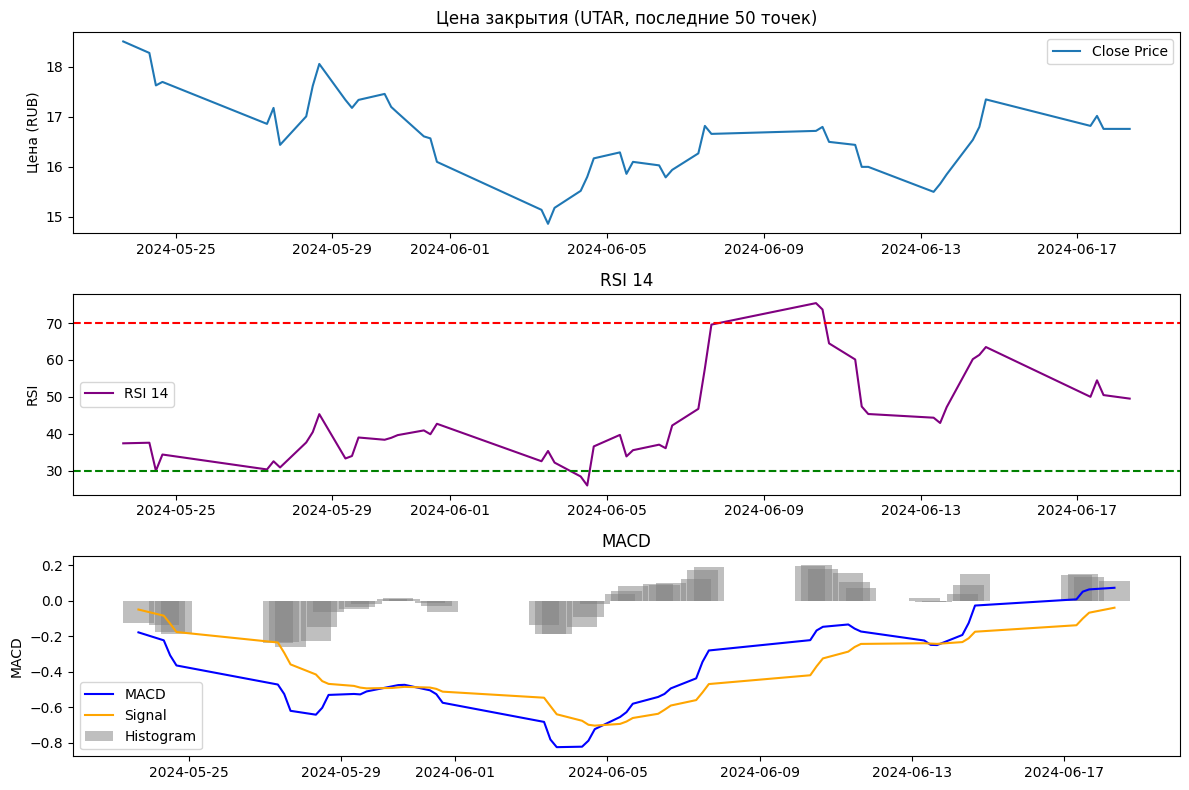

In [8]:
# Построим графики цены закрытия, RSI и MACD.

# %%
if 'indicators_df' in locals():
    plt.figure(figsize=(12, 8))
    
    # График цены закрытия
    plt.subplot(3, 1, 1)
    plt.plot(pd.to_datetime(indicators_df['date']), indicators_df['close'], label='Close Price')
    plt.title('Цена закрытия (UTAR, последние 50 точек)')
    plt.ylabel('Цена (RUB)')
    plt.legend()
    
    # График RSI
    plt.subplot(3, 1, 2)
    plt.plot(pd.to_datetime(indicators_df['date']), indicators_df['RSI_14'], label='RSI 14', color='purple')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title('RSI 14')
    plt.ylabel('RSI')
    plt.legend()
    
    # График MACD
    plt.subplot(3, 1, 3)
    plt.plot(pd.to_datetime(indicators_df['date']), indicators_df['MACD'], label='MACD', color='blue')
    plt.plot(pd.to_datetime(indicators_df['date']), indicators_df['MACD_signal'], label='Signal', color='orange')
    plt.bar(pd.to_datetime(indicators_df['date']), indicators_df['MACD_histogram'], label='Histogram', color='gray', alpha=0.5)
    plt.title('MACD')
    plt.ylabel('MACD')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [10]:
# %% [markdown]
# ## 3. Загрузка финансовых данных МСФО
# Файл: `reports/UTAR-МСФО-годовые.csv`. Используем разделитель `;`.

# %%
msfo_file = os.path.join(BASE_DIR, "reports", "UTAR-МСФО-годовые.csv")
if os.path.exists(msfo_file):
    msfo_df = pd.read_csv(msfo_file, sep=';')
    print("Финансовые данные МСФО (UTAR):")
    display(msfo_df)
    print("\nИнформация о данных:")
    display(msfo_df.info())
else:
    print(f"Файл {msfo_file} не найден.")

Финансовые данные МСФО (UTAR):


,Unnamed: 0,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Дата отчета,10.07.2018,10.07.2018,10.07.2018,03.05.2018,03.05.2018,29.04.2019,26.06.2020,30.04.2021,04.05.2022,02.05.2024,02.05.2024
1,Валюта отчета,RUB,RUB,RUB,RUB,RUB,RUB,RUB,RUB,RUB,RUB,RUB
2,"Пассажиропоток всего, млн чел",NaN,NaN,5.60,6.65,7.30,7.96,7.70,4.80,7.10,NaN,NaN
3,"Пассажиропоток внутр, млн чел",NaN,NaN,4.46,5.60,6.10,NaN,NaN,NaN,NaN,NaN,NaN
4,"Пассажиропоток м/нар, млн чел",NaN,NaN,NaN,NaN,1.20,NaN,NaN,NaN,NaN,NaN,NaN
5,"Занятость пассаж.кресел, %",NaN,NaN,69.9%,71.9%,76.0%,80.0%,83.0%,79.0%,82.3%,NaN,NaN
6,"Грузооборот, млн т",NaN,NaN,0.015,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Выручка, млрд руб",82.9,76.6,70.3,75.4,75.8,82.7,86.3,58.3,75.5,81.0,97.7
8,"Операционная прибыль, млрд руб",NaN,NaN,NaN,NaN,7.58,4.82,8.81,4.25,9.58,18.4,10.1
9,"EBITDA, млрд руб",6.85,-4.28,12.1,13.1,14.1,11.1,19.2,18.5,17.1,26.7,24.6



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48 non-null     object
 1   2013        27 non-null     object
 2   2014        27 non-null     object
 3   2015        34 non-null     object
 4   2016        40 non-null     object
 5   2017        44 non-null     object
 6   2018        42 non-null     object
 7   2019        42 non-null     object
 8   2020        42 non-null     object
 9   2021        42 non-null     object
 10  2022        41 non-null     object
 11  2023        41 non-null     object
dtypes: object(12)
memory usage: 4.6+ KB


None

In [11]:
# Файл: `reports/UTAR-РСБУ-годовые.csv`. Используем разделитель `;`.

# %%
rsbu_file = os.path.join(BASE_DIR, "reports", "UTAR-РСБУ-годовые.csv")
if os.path.exists(rsbu_file):
    rsbu_df = pd.read_csv(rsbu_file, sep=';')
    print("Финансовые данные РСБУ (UTAR):")
    display(rsbu_df)
    print("\nИнформация о данных:")
    display(rsbu_df.info())
else:
    print(f"Файл {rsbu_file} не найден.")

Финансовые данные РСБУ (UTAR):


,Unnamed: 0,2015,2016,2017,2018,2019,2020,2021,2022,2023,LTM
0,Дата отчета,NaN,NaN,02.04.2019,02.04.2019,06.04.2020,02.04.2021,29.04.2022,09.04.2023,16.04.2024,14.05.2024
1,Валюта отчета,RUB,RUB,RUB,RUB,RUB,RUB,RUB,RUB,RUB,RUB
2,"Пассажиропоток всего, млн чел",5.60,6.65,7.30,7.96,7.70,4.80,7.10,NaN,NaN,NaN
3,"Пассажиропоток внутр, млн чел",4.46,5.60,6.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Пассажиропоток м/нар, млн чел",NaN,NaN,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Занятость пассаж.кресел, %",69.9%,71.9%,76.0%,80.0%,83.0%,79.0%,82.3%,NaN,NaN,NaN
6,"Грузооборот, млн т",0.015,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Выручка, млрд руб",49.7,55.7,55.0,58.5,59.2,32.6,48.7,53.3,65.5,68.3
8,"Операционная прибыль, млрд руб",NaN,NaN,0.168,-2.34,1.50,-1.43,0.265,1.27,6.25,3.32
9,"Чистая прибыль, млрд руб",-18.4,1.11,0.931,-4.38,-14.4,-2.06,3.84,4.08,3.43,2.02



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44 non-null     object
 1   2015        25 non-null     object
 2   2016        27 non-null     object
 3   2017        41 non-null     object
 4   2018        39 non-null     object
 5   2019        39 non-null     object
 6   2020        39 non-null     object
 7   2021        39 non-null     object
 8   2022        37 non-null     object
 9   2023        37 non-null     object
 10  LTM         30 non-null     object
dtypes: object(11)
memory usage: 3.9+ KB


None

In [12]:
# ## 5. Загрузка макроэкономических данных
# ### 5.1. Помесячные макроэкономические данные
# Файл: `monthly_macro_indicators_russia.csv`.

# %%
monthly_macro_file = os.path.join(BASE_DIR, "monthly_macro_indicators_russia.csv")
if os.path.exists(monthly_macro_file):
    monthly_macro_df = pd.read_csv(monthly_macro_file)
    print("Помесячные макроэкономические данные России:")
    display(monthly_macro_df.head())
    display(monthly_macro_df.tail())
    print("\nИнформация о данных:")
    display(monthly_macro_df.info())
    
    # Фильтрация за 2024-2025 (как в forecast.py ранее)
    monthly_macro_df['Дата'] = pd.to_datetime(monthly_macro_df['Дата'], format='%Y-%m')
    filtered_monthly = monthly_macro_df[monthly_macro_df['Дата'].dt.year >= 2024]
    print("\nФильтрованные данные (2024-2025):")
    display(filtered_monthly)
else:
    print(f"Файл {monthly_macro_file} не найден.")

Помесячные макроэкономические данные России:


,Дата,"Инфляция (CPI, %, год к году)",Ключевая ставка (%),Уровень безработицы (%),Обменный курс USD/RUB (ср. за месяц)
0,2015-01,15.0,17.0,5.3,61.3
1,2015-02,15.8,15.0,5.8,66.8
2,2015-03,16.2,14.0,5.9,61.8
3,2015-04,16.4,12.5,5.9,54.9
4,2015-05,15.8,11.5,5.6,51.8


,Дата,"Инфляция (CPI, %, год к году)",Ключевая ставка (%),Уровень безработицы (%),Обменный курс USD/RUB (ср. за месяц)
118,2024-11,9.1,19.0,2.5,97.5
119,2024-12,9.5,21.0,2.4,104.2
120,2025-01,9.9,21.0,2.3,98.0
121,2025-02,10.1,21.0,2.4,91.0
122,2025-03,9.9,21.0,2.5,85.0



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Дата                                  123 non-null    object 
 1   Инфляция (CPI, %, год к году)         123 non-null    float64
 2   Ключевая ставка (%)                   123 non-null    float64
 3   Уровень безработицы (%)               123 non-null    float64
 4   Обменный курс USD/RUB (ср. за месяц)  123 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


None


Фильтрованные данные (2024-2025):


,Дата,"Инфляция (CPI, %, год к году)",Ключевая ставка (%),Уровень безработицы (%),Обменный курс USD/RUB (ср. за месяц)
108,2024-01-01,7.5,16.0,2.8,88.9
109,2024-02-01,7.7,16.0,2.7,90.7
110,2024-03-01,7.7,16.0,2.7,91.8
111,2024-04-01,7.8,16.0,2.6,92.5
112,2024-05-01,8.1,16.0,2.6,91.6
113,2024-06-01,8.3,18.0,2.5,88.8
114,2024-07-01,8.5,18.0,2.5,86.6
115,2024-08-01,8.6,19.0,2.5,91.5
116,2024-09-01,8.5,19.0,2.5,92.5
117,2024-10-01,8.8,19.0,2.5,95.5


In [13]:
# ### 5.2. Годовые макроэкономические данные
# Файл: `yearly_macro_indicators_russia.csv`.

# %%
yearly_macro_file = os.path.join(BASE_DIR, "yearly_macro_indicators_russia.csv")
if os.path.exists(yearly_macro_file):
    yearly_macro_df = pd.read_csv(yearly_macro_file)
    print("Годовые макроэкономические данные России:")
    display(yearly_macro_df.head())
    display(yearly_macro_df.tail())
    print("\nИнформация о данных:")
    display(yearly_macro_df.info())
    
    # Фильтрация за 2024-2025 (как в forecast.py ранее)
    filtered_yearly = yearly_macro_df[yearly_macro_df['Год'] >= 2024]
    print("\nФильтрованные данные (2024-2025):")
    display(filtered_yearly)
else:
    print(f"Файл {yearly_macro_file} не найден.")

Годовые макроэкономические данные России:


,Год,Рост ВВП (%),"Инфляция (CPI, %, дек к дек)",Уровень безработицы (%),Ключевая ставка (%),Торговый баланс (млрд USD),Бюджетный дефицит (% ВВП),MOEX (конец года),Обменный курс USD/RUB (ср. за год),Индекс доверия потребителей (%)
0,2015,-2.0,12.9,5.6,10.50,105.0,1.7,1800,68.5,35
1,2016,0.2,5.4,5.6,10.00,122.0,3.0,2200,61.0,30
2,2017,1.8,2.5,5.0,7.50,132.0,1.9,2500,57.6,40
3,2018,2.8,4.3,4.8,7.75,151.0,-0.2,2400,69.0,45
4,2019,2.2,3.0,4.6,6.00,141.0,1.2,2800,62.0,40


,Год,Рост ВВП (%),"Инфляция (CPI, %, дек к дек)",Уровень безработицы (%),Ключевая ставка (%),Торговый баланс (млрд USD),Бюджетный дефицит (% ВВП),MOEX (конец года),Обменный курс USD/RUB (ср. за год),Индекс доверия потребителей (%)
6,2021,5.6,8.4,4.3,9.5,172.0,2.3,4000,74.3,35
7,2022,-2.1,11.9,3.9,7.5,290.0,-0.6,2500,64.7,30
8,2023,3.6,7.4,2.9,16.0,88.0,-0.2,3000,89.7,42
9,2024,3.6,9.5,2.4,21.0,70.0,1.7,3500,104.2,45
10,2025,1.5,7.5,2.4,21.0,70.0,0.6,4000,90.0,50



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Год                                 11 non-null     int64  
 1   Рост ВВП (%)                        11 non-null     float64
 2   Инфляция (CPI, %, дек к дек)        11 non-null     float64
 3   Уровень безработицы (%)             11 non-null     float64
 4   Ключевая ставка (%)                 11 non-null     float64
 5   Торговый баланс (млрд USD)          11 non-null     float64
 6   Бюджетный дефицит (% ВВП)           11 non-null     float64
 7   MOEX (конец года)                   11 non-null     int64  
 8   Обменный курс USD/RUB (ср. за год)  11 non-null     float64
 9   Индекс доверия потребителей (%)     11 non-null     int64  
dtypes: float64(7), int64(3)
memory usage: 1012.0 bytes


None


Фильтрованные данные (2024-2025):


,Год,Рост ВВП (%),"Инфляция (CPI, %, дек к дек)",Уровень безработицы (%),Ключевая ставка (%),Торговый баланс (млрд USD),Бюджетный дефицит (% ВВП),MOEX (конец года),Обменный курс USD/RUB (ср. за год),Индекс доверия потребителей (%)
9,2024,3.6,9.5,2.4,21.0,70.0,1.7,3500,104.2,45
10,2025,1.5,7.5,2.4,21.0,70.0,0.6,4000,90.0,50


In [14]:
# %% [markdown]
# ## 6. Оценка объёма данных для LLM
# Подсчитаем количество символов и токенов, как в forecast.py.

# %%
if 'indicators_df' in locals() and 'msfo_df' in locals():
    indicators_str = indicators_df.to_string(index=False)
    msfo_str = msfo_df.to_string(index=False) if 'msfo_df' in locals() else "Отсутствует"
    rsbu_str = rsbu_df.to_string(index=False) if 'rsbu_df' in locals() else "Отсутствует"
    
    total_chars = len(indicators_str) + len(msfo_str) + len(rsbu_str)
    estimated_tokens = total_chars // 4
    
    print(f"Общий объём данных для LLM:")
    print(f"- Индикаторы: {len(indicators_str)} символов")
    print(f"- МСФО: {len(msfo_str)} символов")
    print(f"- РСБУ: {len(rsbu_str)} символов")
    print(f"Итого: {total_chars} символов, ~{estimated_tokens} токенов")

Общий объём данных для LLM:
- Индикаторы: 9944 символов
- МСФО: 7790 символов
- РСБУ: 6254 символов
Итого: 23988 символов, ~5997 токенов
